In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [5]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/archive/trained_model.h5')

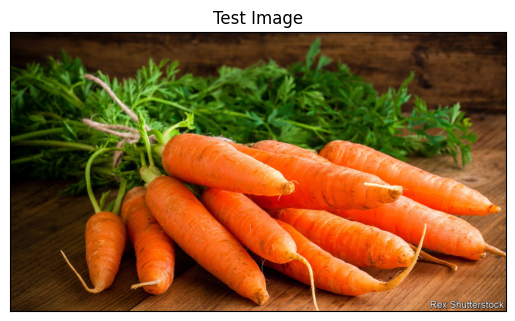

In [12]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/archive/test/carrot/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 28ms/step


In [14]:
print(predictions)

[[8.69436256e-09 3.61182411e-13 9.15655036e-08 7.92653623e-07
  1.02961480e-10 8.81129552e-08 9.99995947e-01 1.13602065e-10
  3.10179189e-07 2.00011829e-08 4.63440675e-11 2.08084439e-09
  7.45091933e-10 5.66863570e-12 4.25238555e-09 1.98167394e-09
  3.00444739e-11 1.31620105e-11 5.07663443e-12 4.30680325e-10
  2.67105840e-08 8.72492467e-10 1.10891506e-07 3.29213057e-09
  2.61597992e-12 7.26764199e-07 1.51865891e-07 6.19915952e-10
  1.60100893e-08 1.20236474e-10 1.52918733e-10 1.00342804e-10
  6.37392306e-10 1.64980577e-06 1.23644668e-08 6.31329655e-09]]


In [15]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

6


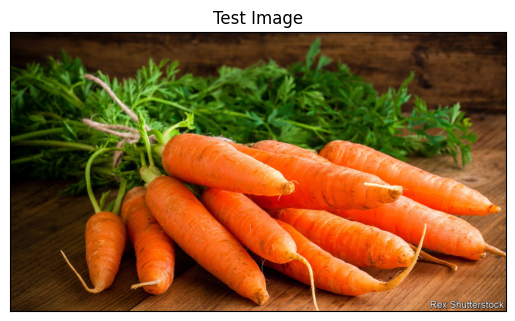

In [16]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a carrot
